# PRÁCTICA 1

## Imports

In [45]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import leidenalg
import igraph as ig

## Carga del grafo

In [46]:
G = nx.read_graphml("./data/hashtags_cleaned/hashtags_cleaned.graphml")
print("INFORMACIÓN DEL GRAFO:")
print(f"Numero de nodos: {G.number_of_nodes()}")
print(f"Numero de aristas: {G.number_of_edges()}")

INFORMACIÓN DEL GRAFO:
Numero de nodos: 47544
Numero de aristas: 536124


Como el grafo es bastante grande no podemos realizar una visualización completa de este.

## Ejercicio 1

Calcula las comunidades, utilizándo el algoritmo de Leiden. ¿Cuantas comunidades salen?

In [47]:
# Convertir el grafo de NetworkX a igraph
G_ig = ig.Graph.TupleList(G.edges(), directed=False)

# Ejecutar el algoritmo de Leiden para detectar comunidades
partition = leidenalg.find_partition(G_ig, leidenalg.ModularityVertexPartition)

# Número de comunidades detectadas
num_comunidades = len(partition)
print(f"Número de comunidades detectadas: {num_comunidades}")

# Mostrar los nodos en cada comunidad
for i, comunidad in enumerate(partition):
    print(f"Comunidad {i + 1}: {len(comunidad)} nodos")

Número de comunidades detectadas: 48
Comunidad 1: 10019 nodos
Comunidad 2: 7485 nodos
Comunidad 3: 6671 nodos
Comunidad 4: 6363 nodos
Comunidad 5: 5985 nodos
Comunidad 6: 3441 nodos
Comunidad 7: 2037 nodos
Comunidad 8: 1662 nodos
Comunidad 9: 1332 nodos
Comunidad 10: 1069 nodos
Comunidad 11: 314 nodos
Comunidad 12: 245 nodos
Comunidad 13: 214 nodos
Comunidad 14: 202 nodos
Comunidad 15: 125 nodos
Comunidad 16: 45 nodos
Comunidad 17: 23 nodos
Comunidad 18: 22 nodos
Comunidad 19: 19 nodos
Comunidad 20: 19 nodos
Comunidad 21: 18 nodos
Comunidad 22: 18 nodos
Comunidad 23: 17 nodos
Comunidad 24: 15 nodos
Comunidad 25: 13 nodos
Comunidad 26: 12 nodos
Comunidad 27: 12 nodos
Comunidad 28: 11 nodos
Comunidad 29: 11 nodos
Comunidad 30: 10 nodos
Comunidad 31: 10 nodos
Comunidad 32: 9 nodos
Comunidad 33: 9 nodos
Comunidad 34: 8 nodos
Comunidad 35: 8 nodos
Comunidad 36: 8 nodos
Comunidad 37: 8 nodos
Comunidad 38: 7 nodos
Comunidad 39: 6 nodos
Comunidad 40: 6 nodos
Comunidad 41: 6 nodos
Comunidad 42:

## Ejercicio 2

Colapsa el grafo de forma que cada nodo sea una comunidad, manteniendo los atributos.

In [48]:
# Creamos un diccionario que relaciona los nodos a las comunidades
node_to_community = {}
for community_index, community in enumerate(partition):
    for node in community:
        node_to_community[list(G.nodes())[node]] = community_index

print("Asignación de nodos a comunidades:")
print(node_to_community)

Asignación de nodos a comunidades:
{'Chine': 0, 'James': 0, 'forex_fx': 0, 'eurusd': 0, 'Britain': 0, 'Vikings': 0, 'RedSox': 0, 'Rockets': 0, 'Abbott': 0, 'Bulls': 0, 'Cubs': 0, 'sunnyhostin': 0, 'pussygrabing': 0, 'IARTG': 0, 'LWV': 0, 'LWVRadnor': 0, 'freedomofspeech': 0, 'bigfatliar': 0, 'Loser': 0, 'pride': 0, 'ego': 0, 'UBI': 0, 'iPhone': 0, 'indiaheraldgroup': 0, 'aclu': 0, 'mediabias': 0, 'bonitasprings': 0, 'Trumplicans': 0, 'OneAlabama': 0, 'Connecticut': 0, 'Fresh': 0, 'demanddecency': 0, 'GoTrump': 0, 'womenwhoCode': 0, 'wwg': 0, 'magamyass': 0, 'caezaepichi': 0, 'Fdi': 0, 'I': 0, 'COMINGSOON': 0, 'EnjoyTheShow': 0, 'DemCastMI': 0, 'nzqanda': 0, 'ImpeachmentDay': 0, 'LisaMurkowski': 0, 'county': 0, 'memories': 0, 'BillStepien': 0, 'ThomasSowell': 0, 'Roma': 0, 'FMI': 0, 'Merval': 0, 'OOTT': 0, 'fakepolls': 0, 'utah': 0, 'FailureInChief': 0, 'gold': 0, 'BlackWoman': 0, 'mccann': 0, 'FiverrBuyer': 0, 'LongIsland': 0, 'blmmovement': 0, 'ForThe7Jewels': 0, 'AVotelessPeopleIsAHo

In [49]:
# Crear un nuevo grafo colapsado
collapsed_graph = nx.Graph()

# Agregar un nodo para cada comunidad
for community_index in range(len(partition)):
    collapsed_graph.add_node(community_index, size=len(partition[community_index]))  # Tamaño de la comunidad

# Agregar aristas entre comunidades
for edge in G.edges():
    # Verificar que ambos nodos estén asignados a una comunidad
    if edge[0] in node_to_community and edge[1] in node_to_community:
        comunidad_u = node_to_community[edge[0]]
        comunidad_v = node_to_community[edge[1]]

        # Si son diferentes, añadimos o incrementamos el peso de la arista entre comunidades
        if comunidad_u != comunidad_v:
            if collapsed_graph.has_edge(comunidad_u, comunidad_v):
                collapsed_graph[comunidad_u][comunidad_v]["weight"] += 1
            else:
                collapsed_graph.add_edge(comunidad_u, comunidad_v, weight=1)

print("INFORMACIÓN DEL GRAFO COLAPSADO:")
print(f"Numero de nodos: {collapsed_graph.number_of_nodes()}")
print(f"Numero de aristas: {collapsed_graph.number_of_edges()}")

INFORMACIÓN DEL GRAFO COLAPSADO:
Numero de nodos: 48
Numero de aristas: 472


Vamos a representar visualmente el grafo colapsado. En esta representación, el tamaño de un nodo n representará el tamaño de la comunidad; y las aristas tendrán un ancho proporcional al número de conexiones entre esas dos comunidades relativo al número de nodos totales de ambas comunidades.

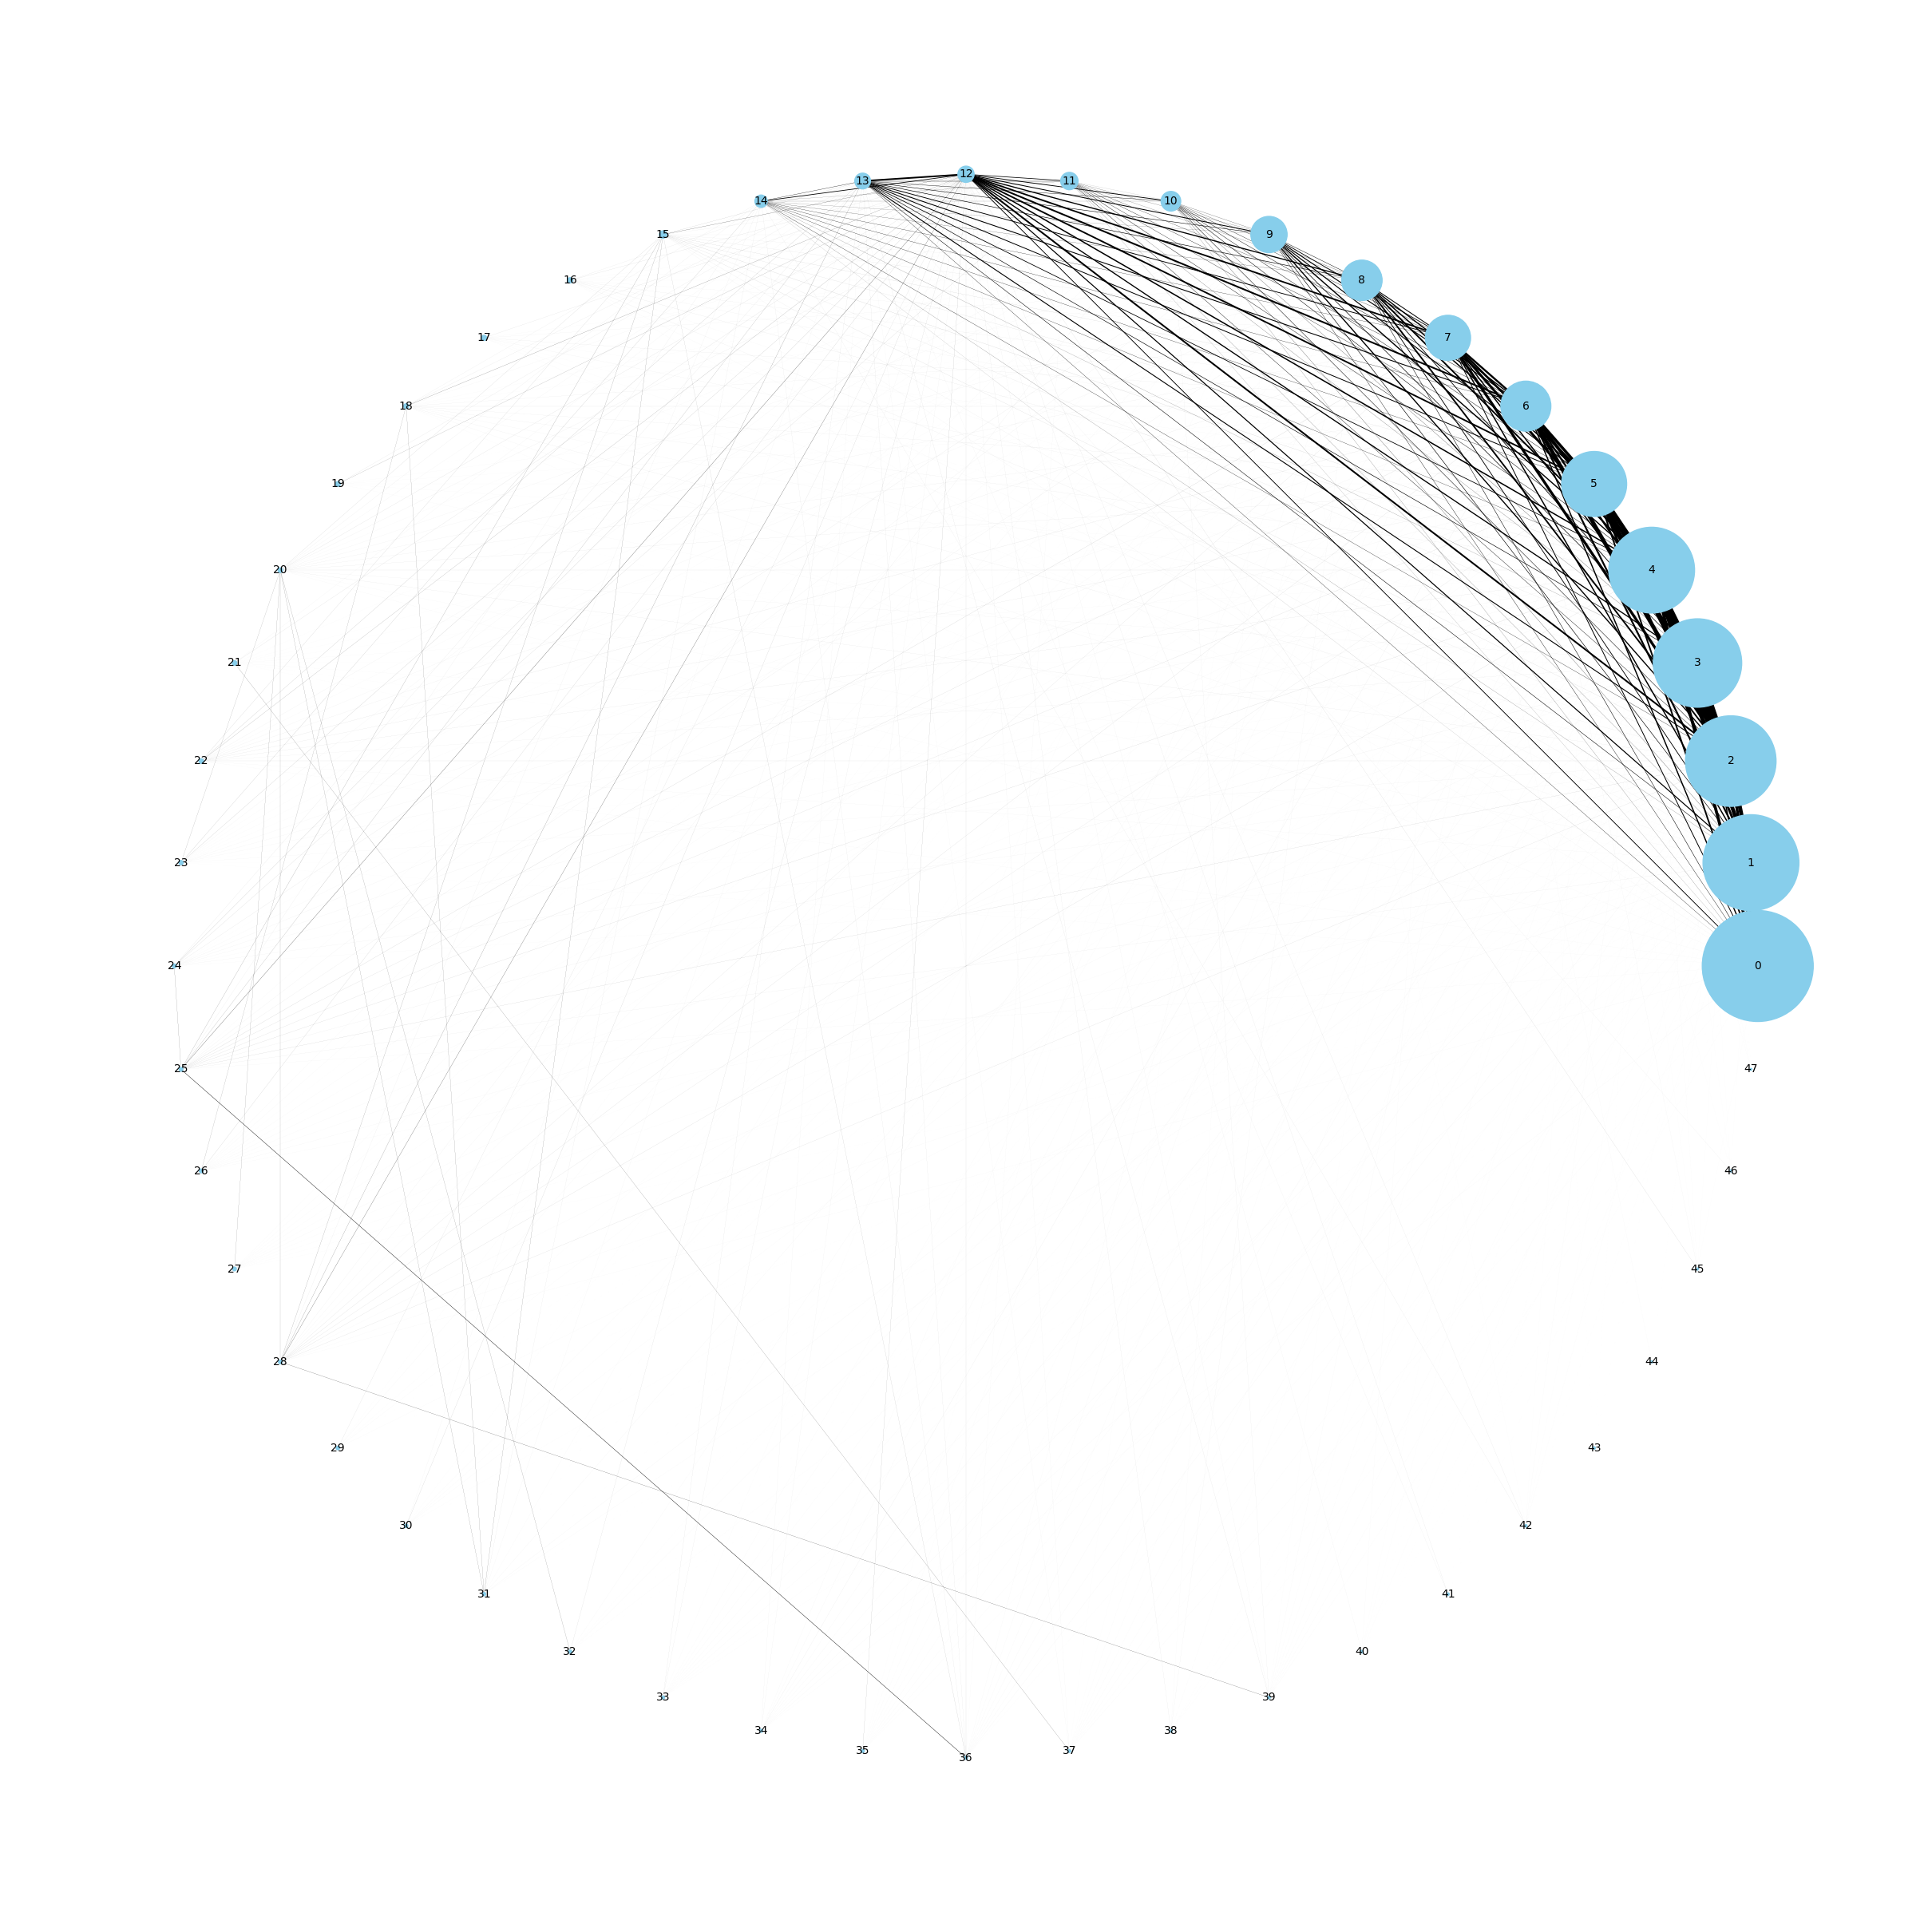

In [50]:
node_sizes = [collapsed_graph.nodes[node]["size"] for node in collapsed_graph.nodes]
edge_weights = [2 * collapsed_graph[u][v]["weight"] / (collapsed_graph.nodes[u]["size"] + collapsed_graph.nodes[v]["size"]) for u, v in collapsed_graph.edges]

# Configurar el layout circular
pos = nx.circular_layout(collapsed_graph)

# Crear el gráfico
plt.figure(figsize=(24, 24))

nx.draw(
    collapsed_graph,
    pos=pos,  # Usar layout circular
    with_labels=True,
    node_size=node_sizes,
    width=edge_weights,
    node_color="skyblue",
    font_size=10,
    edge_color="black"
)

# Mostrar el gráfico
plt.show()